In [1]:
import cv2
import matplotlib.pyplot as plt

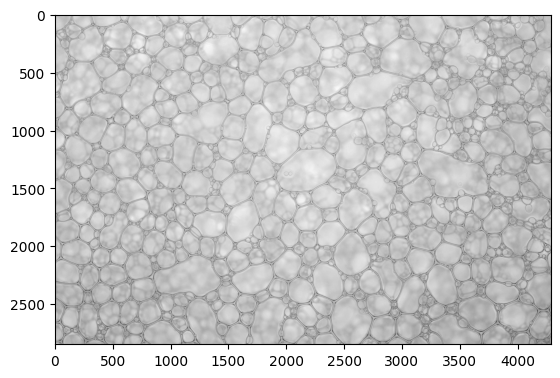

In [3]:
img = cv2.imread("beer.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")